In [1]:
import sys, os
sys.path.insert(0, os.path.abspath("../.."))
%load_ext ElasticNotebook

In [2]:
%%RecordEvent
import pandas as pd
gl = pd.read_csv('game_logs.csv')
gl.head()

FileNotFoundError: [Errno 2] No such file or directory: 'game_logs.csv'

In [3]:
%%RecordEvent
gl.info(memory_usage='deep')

NameError: name 'gl' is not defined

In [4]:
%%RecordEvent
for dtype in ['float','int','object']:
    selected_dtype = gl.select_dtypes(include=[dtype])
    mean_usage_b = selected_dtype.memory_usage(deep=True).mean()
    mean_usage_mb = mean_usage_b / 1024 ** 2
    print("Average memory usage for {} columns: {:03.2f} MB".format(dtype,mean_usage_mb))

NameError: name 'gl' is not defined

In [5]:
%%RecordEvent
def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # we assume if not a df it's a series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # convert bytes to megabytes
    return "{:03.2f} MB".format(usage_mb)

In [6]:
%%RecordEvent
gl_int = gl.select_dtypes(include=['int'])
converted_int = gl_int.apply(pd.to_numeric,downcast='unsigned')
print(mem_usage(gl_int))
print(mem_usage(converted_int))
compare_ints = pd.concat([gl_int.dtypes,converted_int.dtypes],axis=1)
compare_ints.columns = ['before','after']
compare_ints.apply(pd.Series.value_counts)

NameError: name 'gl' is not defined

In [7]:
%%RecordEvent
gl_float = gl.select_dtypes(include=['float'])
converted_float = gl_float.apply(pd.to_numeric,downcast='float')
print(mem_usage(gl_float))
print(mem_usage(converted_float))
compare_floats = pd.concat([gl_float.dtypes,converted_float.dtypes],axis=1)
compare_floats.columns = ['before','after']
compare_floats.apply(pd.Series.value_counts)

NameError: name 'gl' is not defined

In [8]:
%%RecordEvent
optimized_gl = gl.copy()
optimized_gl[converted_int.columns] = converted_int
optimized_gl[converted_float.columns] = converted_float

print(mem_usage(gl))
print(mem_usage(optimized_gl))

NameError: name 'gl' is not defined

In [9]:
%%RecordEvent
gl_obj = gl.select_dtypes(include=['object']).copy()
gl_obj.describe()

NameError: name 'gl' is not defined

In [10]:
%%RecordEvent
dow = gl_obj.day_of_week
print(dow.head())
dow_cat = dow.astype('category')
print(dow_cat.head())

NameError: name 'gl_obj' is not defined

In [11]:
%%RecordEvent
converted_obj = pd.DataFrame()
for col in gl_obj.columns:
    num_unique_values = len(gl_obj[col].unique())
    num_total_values = len(gl_obj[col])
    if num_unique_values / num_total_values < 0.5:
        converted_obj.loc[:,col] = gl_obj[col].astype('category')
    else:
        converted_obj.loc[:,col] = gl_obj[col]

NameError: name 'gl_obj' is not defined

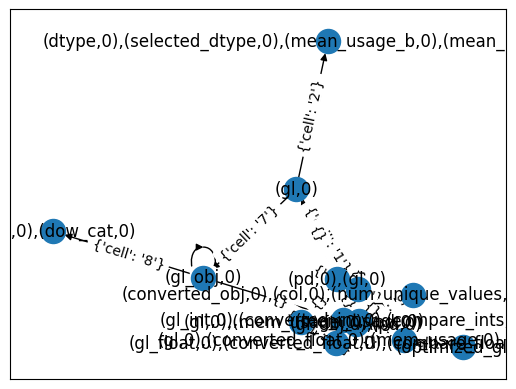

In [12]:
%Inspect

In [13]:
%Checkpoint checkpoints/pandas.pickle


KeyError: 'gl'